<a href="https://colab.research.google.com/github/kaiomudkt/decision_tree_classifier_review_score/blob/main/trab_arvore_decisao_reviews_score_ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Lendo os arquivos CSV**

In [ ]:
# reading csv files

#"product_id","product_category_name","product_name_lenght","product_description_lenght","product_photos_qty","product_weight_g","product_length_cm","product_height_cm","product_width_cm"
products = pd.read_csv('/content/drive/MyDrive/UFMS/7º Semestre/IA/dados_ecommerce_para_arvore_decisao/olist_products_dataset.csv')
#"order_id","order_item_id","product_id","seller_id","shipping_limit_date","price","freight_value"
order_items = pd.read_csv('/content/drive/MyDrive/UFMS/7º Semestre/IA/dados_ecommerce_para_arvore_decisao/olist_order_items_dataset.csv')
#"seller_id","seller_zip_code_prefix","seller_city","seller_state"
# sellers = pd.read_csv('/content/drive/MyDrive/UFMS/7º Semestre/IA/dados_ecommerce_para_arvore_decisao/olist_sellers_dataset.csv')
#"order_id","customer_id","order_status","order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"
orders = pd.read_csv('/content/drive/MyDrive/UFMS/7º Semestre/IA/dados_ecommerce_para_arvore_decisao/olist_orders_dataset.csv')
#"order_id","payment_sequential","payment_type","payment_installments","payment_value"
order_payments = pd.read_csv('/content/drive/MyDrive/UFMS/7º Semestre/IA/dados_ecommerce_para_arvore_decisao/olist_order_payments_dataset.csv')
#"customer_id","customer_unique_id","customer_zip_code_prefix","customer_city","customer_state"
# customers = pd.read_csv('/content/drive/MyDrive/UFMS/7º Semestre/IA/dados_ecommerce_para_arvore_decisao/olist_customers_dataset.csv')
#"review_id","order_id","review_score","review_comment_title","review_comment_message","review_creation_date","review_answer_timestamp"
order_reviews = pd.read_csv('/content/drive/MyDrive/UFMS/7º Semestre/IA/dados_ecommerce_para_arvore_decisao/olist_order_reviews_dataset.csv')
#"geolocation_zip_code_prefix","geolocation_lat","geolocation_lng","geolocation_city","geolocation_state"
# geolocation = pd.read_csv('/content/drive/MyDrive/UFMS/7º Semestre/IA/dados_ecommerce_para_arvore_decisao/olist_geolocation_dataset.csv')
#product_category_name,product_category_name_english
# products_category_name_translation = pd.read_csv('/content/drive/MyDrive/UFMS/7º Semestre/IA/dados_ecommerce_para_arvore_decisao/product_category_name_translation.csv')


Algumas chaves primarias estão repetindo

In [ ]:
max(products.product_id.value_counts())

1

In [ ]:
max(order_items.order_id.value_counts()) 

21

In [ ]:
max(order_items.product_id.value_counts()) 

527

In [ ]:
max(orders.order_id.value_counts()) 

1

### **Juntando as tabelas**

In [ ]:
# dataframe with merge all tables
dfFull = pd.merge(products, order_items, on='product_id', how='left')
dfFull = pd.merge(dfFull, orders, on='order_id', how='inner')
dfFull = pd.merge(dfFull, order_payments, on='order_id', how='inner')
# dfFull = pd.merge(dfFull, customers, on='customer_id', how='inner')
dfFull = pd.merge(dfFull, order_reviews, on='order_id', how='inner')
#dfFull = pd.merge(dfFull, geolocation, on='zip_code_prefix', how='inner')
# dfFull = pd.merge(dfFull, sellers, on='seller_id', how='inner')
# dfFull = pd.merge(dfFull, products_category_name_translation, on='product_category_name', how='inner')
# dfFull.groupby(by='product_category_name')
# dfFull.groupby(by='review_score')

### **Processando algumas colunas parar gerar dados que talvez ajudem mais que os dados brutos**

In [ ]:
dfFull[['review_comment_message', 'review_score']][:10]

,review_comment_message,review_score
0,Super adooorei o delineador ele é bem preto e ...,5
1,Excelente apontador! Em 3 segundos uma ponta p...,5
2,NaN,5
3,modelo comprado: travesseiro memoria carinho B...,1
4,NaN,5
5,NaN,5
6,Veio faltando o bebê conforto,2
7,NaN,5
8,Na entrega veio faltando os dois assento futon...,2
9,Na entrega veio faltando os dois assento futon...,2


**Substituindo classe review_score por nova coluna, com somente duas classes (bin_score)**

In [ ]:
# soma review_score de 1,2,3 e 4 estrelas,                 conta a quantidade de items do review_score 
dfFull.review_score[dfFull.review_score!=5].value_counts().sum(), dfFull.review_score[dfFull.review_score==5].value_counts().sum()

(51945, 66370)

In [ ]:
#criando coluna 'bin_score' que vai ser meu 'y', substituindo 'review_score'
#bin_score = score_binario, ou é 5 estrelas ou nao é 5 estrelas
#faço isso para tentar balancear a coluna target de classificao
dfFull['bin_score'] = 0

index_minoritario = dfFull[dfFull.review_score!=5].index
dfFull['bin_score'].iloc[index_minoritario] = int(0)

index_majoritario =  dfFull[dfFull.review_score==5].index
dfFull['bin_score'].iloc[index_majoritario] = int(1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
dfFull['bin_score'].value_counts()

1    66370
0    51945
Name: bin_score, dtype: int64

**atraso na entrega (late delivery)**

In [ ]:
# dfFull[['order_delivered_carrier_date', 'shipping_limit_date', 'late_delivery']][:10]

In [ ]:
data_entrega = pd.to_datetime(dfFull['order_delivered_carrier_date'])
data_estimada = pd.to_datetime(dfFull['shipping_limit_date'])
dfFull['late_delivery'] = data_entrega < data_estimada  

**classificando 'freight_value'**

In [ ]:
mediana = dfFull['freight_value'].median()

dfFull['bin_freight']  = 'init'

index_bin_freight = dfFull[dfFull.freight_value >= mediana].index
dfFull['bin_freight'].iloc[index_bin_freight] = 0

index_bin_freight = dfFull[dfFull.freight_value < mediana].index
dfFull['bin_freight'].iloc[index_bin_freight] = 1

dfFull['bin_freight'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


0    59245
1    59070
Name: bin_freight, dtype: int64

### **Seleciono quais colunas(features) vou usar, mas sempre retiro sa colunas de ID**

In [ ]:
used_columns = ['bin_freight', 'late_delivery', 'product_description_lenght', 'product_photos_qty', 'price', 'payment_value']

In [ ]:
# dfFull['late_delivery'] = 'init'

**Y coluna target**,
**X coluna features, 
que vou enviar para o algoritmo DecisionTreeClassifier**

---



In [ ]:
# y = dfFull['review_score']# estrelas: 1,2,3,4 e 5
y = dfFull['bin_score']# ou tem muitas estrelas  (5 estrelas), ou tem 
X = dfFull.drop(dfFull.columns.difference(used_columns), 1) # retira todas as colunas do 'dfFull' que nao vamos usar em 'X'

In [ ]:
dfFull.shape, X.shape, y.shape

((118315, 35), (118315, 6), (118315,))

In [ ]:
# agora tenho uma coluna que dividi em duas partes o meu 'review_score'
dfFull.bin_score.value_counts()

1    66370
0    51945
Name: bin_score, dtype: int64

In [ ]:
dfFull.review_score.value_counts()

5    66370
4    22352
1    15427
3     9965
2     4201
Name: review_score, dtype: int64

**splitando dataframe em treino e teste**

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [ ]:
#  # test_index: é o index das linhas de 30% do dataset
#  # train_index: é o idex das linhas de 70% do dataset
# from sklearn.model_selection import StratifiedShuffleSplit
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.30, random_state=42)
# for train_index, test_index in sss.split(X,y): # dividi dataframe
# # for train_index, test_index in sss.split(dfFull,y): # dividi dataframe
#   # T R E I N O
#   X_train = X.iloc[train_index]
#   y_train = y.iloc[train_index]
#   # T E S T E
#   X_test = X.iloc[test_index]
#   y_test = y.iloc[test_index]

In [ ]:
# 70% de 116581 = 81606.7
# 70% de 116581 = 34974.3
dfFull.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((118315, 35), (79271, 6), (79271,), (39044, 6), (39044,))

**balanceando as classes com resample, depois do split, no X_train** , quando dividi a classe review_score em somente duas, ja deu uma balanceada boa entre as cinco classes, mas vou fazer mais uma balanceamento no 'bin_score' para testar se melhora a acuracia, seguindo a ideia que o professor conversou na aula do dia 27 mai 2021

In [ ]:
# index_X_train = X_train.index
# a = X_[index_X_train in index_majoritario]

In [ ]:
# X_train_upsampled.columns

In [ ]:
#@title shape dos dados: originais, balanceado, de treino, de teste
# check the shape of X_train and X_test
# 33% de 116581: 38471.73 E  67% de 116581: 78109.27
# dfFull.shape, df_upsampled.shape, X_train.shape, X_test.shape

**Engenharia de recursos, processo de transformar dados brutos em recursos úteis que nos ajudam a entender melhor nosso modelo e aumentar seu poder preditivo.**

In [ ]:
# check data types in X_train
# X_train.dtypes

In [ ]:
# X_train.head()

In [ ]:
pip install --upgrade category_encoders

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.7/dist-packages (2.2.2)


In [ ]:
# encode variables with ordinal encoding

# import category encoders
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=used_columns)
# X_train_encoder = encoder.fit_transform(X_train_upsampled)
X_train_encoder = encoder.fit_transform(X_train)
X_test_encoder = encoder.transform(X_test)
# X_train_encoder

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
# #feature scaling
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)
# X_train_encoder

**com dados prontos, podemos usar a arvore de decisao classificadora**

In [ ]:
# from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

**Preveja os resultados do conjunto de testes com critério: entropia ou gini**

In [ ]:
X_train_encoder.shape ,y_train.shape


((79271, 6), (79271,))

In [ ]:
# fit the model
# {1:6, 2:9, 3:9,   4:4,   5:1}, 
# {1:2, 2:7, 3:2.5, 4:1.5, 5:0.5}
# {1:2, 2:6, 3:3.5, 4:1.5, 5:0.5}
# {1: 0.2, 2: 0.2, 3: 0.3, 4: 0.1, 5: 0.05}
# {1: 0.15, 2: 0.2, 3: 0.3, 4: 0.1, 5: 0.05}
# {1:.2, 2:.0, 3:.2, 4:.32, 5:.12}
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, class_weight={0:.4, 1:.6}, random_state=0)
# clf = DecisionTreeClassifier(criterion='gini', max_depth=3, class_weight={1:2, 2:6, 3:3.5, 4:1.5, 5:0.5}, random_state=0)

# clf = DecisionTreeClassifier(criterion = "entropy", splitter = "random", max_depth = 2,  min_samples_split = 5, min_samples_leaf = 2, max_features = 2)
clf.fit(X_train_encoder, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.4, 1: 0.6},
                       criterion='gini', max_depth=3, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

**Preveja os resultados do conjunto de testes**

In [ ]:
y_pred = clf.predict(X_test_encoder)

In [ ]:
#@title quais são as estrelas que aparecem e quantos produtos cada uma delas tem?
import numpy as np
unique_elements, counts_elements = np.unique(y_pred, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[    0     1]
 [ 2610 36434]]


**Verifique a pontuação de precisão**

In [ ]:
from sklearn.metrics import accuracy_score
print('Pontos de acuracia do modelo, olhe o criterio usado: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Pontos de acuracia do modelo, olhe o criterio usado: 0.5754


**comparando a precisão do conjunto de treinamento e teste para verificar se há overfitting**

In [ ]:
y_pred_train = clf.predict(X_train_encoder)
y_pred_train

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.5741


Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train_encoder, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test_encoder, y_test)))

Training set score: 0.5741
Test set score: 0.5754


Esses dois valores são bastante comparáveis?. há sinais de sobreajuste?

**Visualize decision-trees**

In [ ]:
import matplotlib.pyplot as plt # data visualization

[Text(279.0, 237.82500000000002, 'X[4] <= 1.5\ngini = 0.451\nsamples = 79271\nvalue = [13958.0, 26625.6]'),
 Text(139.5, 169.875, 'X[5] <= 1.5\ngini = 0.441\nsamples = 71089\nvalue = [12020.0, 24623.4]'),
 Text(69.75, 101.92500000000001, 'X[0] <= 502.5\ngini = 0.45\nsamples = 35441\nvalue = [6218.8, 11936.4]'),
 Text(34.875, 33.974999999999994, 'gini = 0.459\nsamples = 15390\nvalue = [2794.0, 5043.0]'),
 Text(104.625, 33.974999999999994, 'gini = 0.443\nsamples = 20051\nvalue = [3424.8, 6893.4]'),
 Text(209.25, 101.92500000000001, 'X[2] <= 455.5\ngini = 0.431\nsamples = 35648\nvalue = [5801.2, 12687.0]'),
 Text(174.375, 33.974999999999994, 'gini = 0.436\nsamples = 24854\nvalue = [4133.2, 8712.6]'),
 Text(244.125, 33.974999999999994, 'gini = 0.416\nsamples = 10794\nvalue = [1668.0, 3974.4]'),
 Text(418.5, 169.875, 'X[2] <= 3666.5\ngini = 0.5\nsamples = 8182\nvalue = [1938.0, 2002.2]'),
 Text(348.75, 101.92500000000001, 'X[0] <= 391.5\ngini = 0.5\nsamples = 7932\nvalue = [1869.2, 1955.4]'

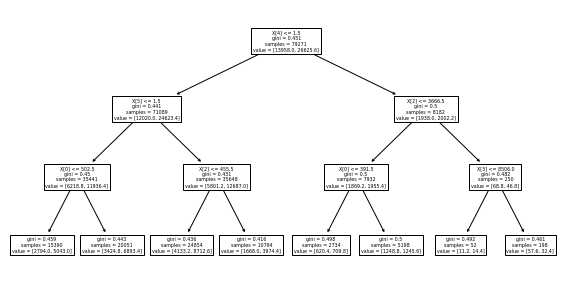

In [ ]:
plt.figure(figsize=(10,5))

from sklearn import tree

tree.plot_tree(clf.fit(X_train_encoder, y_train)) 

Visualize decision-trees with graphviz

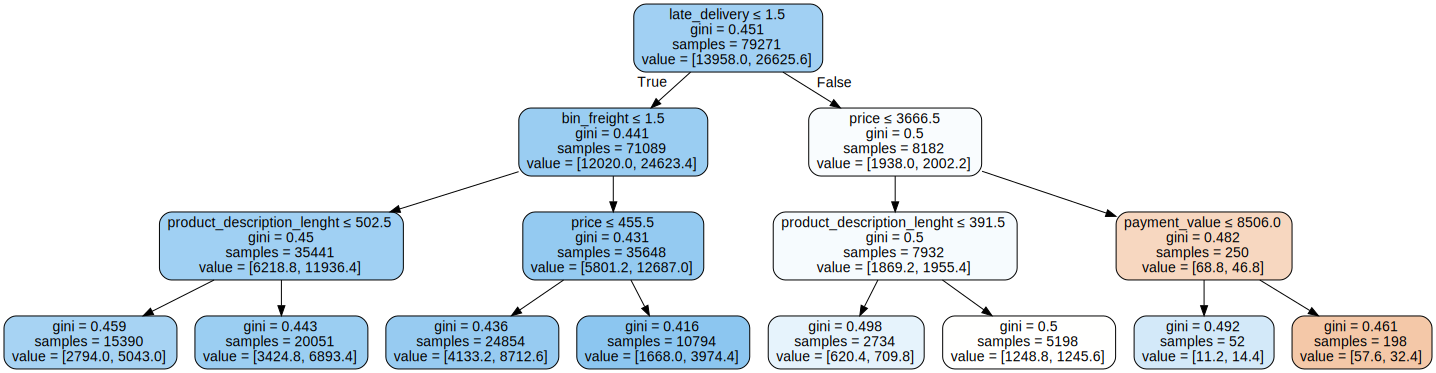

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                              feature_names=X_train_encoder.columns,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

Alunos
 * Vinicius Espindola 2018.1907.077-8
 * Kaio Lino 2018.1907.056-5

# **Relatorio** 

---


 Foi observado que a maioria dos reviews dos produtos são de cinco e uma estrela, isso se deve ao fato de que os reviews são muito extremos.
 
Olhando para a árvore, conseguimos perceber que a partir das colunas utilizadas, o nó raiz escolhido pelo algoritmo do sklearn, é a coluna 'late_delivery', que significa: "se houve atraso na entrega", pois é a melhor coluna para dividir o dados. A partir disso, podemos olhar para o nó filho a esquerda da raiz, onde não houve atrasado, nó da coluna 
'bin_freight', onde representa se o preço do frete foi cara ou barato, indo pra o filho esquerdo, com o frete mais barato, temos o nó do tamanho da descrição, acreidto que esse nó significa que produtos com descrições maiores tendem a explicar melhor oque seja o produto, causando menor decepção pelo comprador. Assim, conseguimos chegar a um dos nós folhas, no caso o nó esquerdo, onde temos o vetor: "value = [2794.0, 5043.0]", dividindo-os em classe '0' e classe '1', onde a classe '0' representa a classes com poucas estrelas, e a classe um representa com '5' estrelas.


**Portando, recomendamos ao dono do marketplace que:**

1.   Não atrase as entregas;
2.   Tente baixar o preço do frete;
3.   Produto com valores menores, tendem a receber avaliações melhor(talvez pela baixa espectativa);
4.   Tente criar uma descrição grande e rica de detalhes sobre seus produtos para que seu cliente saiba oque esta comprando, e não se decepcione, baixando sua 'review_score';
5.   Compras de com valor alto, tende a ter notas baixas, provavelmente pelo alto investimento feito pelo cliente, e suas grande espectativas.

